In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [5]:
from google.colab import files
uploaded=files.upload()

Saving Alphabets_data.csv to Alphabets_data.csv


In [8]:
df=pd.read_csv('Alphabets_data.csv')
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [10]:
df.shape

(20000, 17)

In [12]:
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [13]:
df.duplicated().sum()

1332

In [14]:
df=df.drop_duplicates()
df.shape

(18668, 17)

<Axes: xlabel='count', ylabel='letter'>

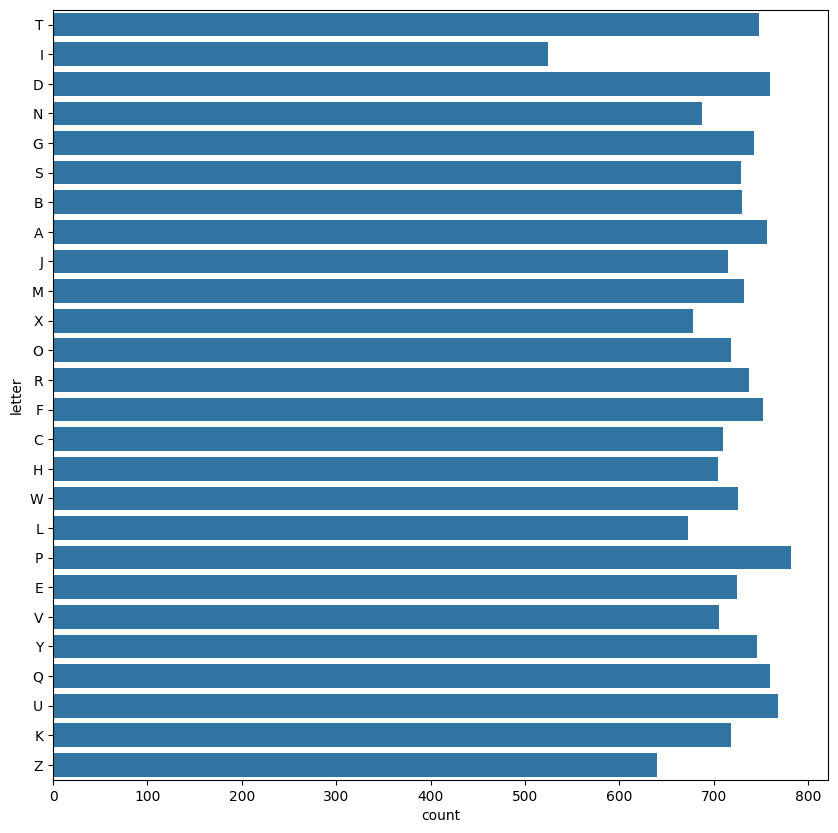

In [58]:
plt.figure(figsize=(10,10))
sns.countplot(df['letter'])

In [18]:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000
mean,4.150793,7.244322,5.279891,5.506910,3.660596,6.919381,7.529409,4.584637,5.201361,8.353171,6.452700,7.924577,3.131455,8.351832,3.796872,7.784390
std,1.879428,3.187660,1.934960,2.178292,2.160555,2.032226,2.319834,2.625714,2.320102,2.468905,2.624673,2.106957,2.323901,1.574853,2.540271,1.657358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,2.000000,8.000000,2.000000,7.000000
50%,4.000000,8.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,4.000000,8.000000
75%,5.000000,10.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,9.000000
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000


In [19]:
target=df[['letter']]
target

,letter
0,T
1,I
2,D
3,N
4,G
...,...
19994,T
19995,D
19996,C
19997,T


In [20]:
feature=df.drop('letter',axis=1)
feature

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,5,8,7,7,7,7,9,4,8,7,7,8,3,10,8,6
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4


In [21]:
min_sca=MinMaxScaler()

In [22]:
feature=min_sca.fit_transform(feature)
feature

array([[0.13333333, 0.53333333, 0.2       , ..., 0.53333333, 0.        ,
        0.53333333],
       [0.33333333, 0.8       , 0.2       , ..., 0.53333333, 0.26666667,
        0.66666667],
       [0.26666667, 0.73333333, 0.4       , ..., 0.46666667, 0.2       ,
        0.6       ],
       ...,
       [0.46666667, 0.66666667, 0.53333333, ..., 0.6       , 0.2       ,
        0.46666667],
       [0.4       , 0.6       , 0.4       , ..., 0.8       , 0.13333333,
        0.26666667],
       [0.26666667, 0.6       , 0.4       , ..., 0.46666667, 0.13333333,
        0.53333333]])

In [23]:
robust=RobustScaler()

In [24]:
feature=robust.fit_transform(feature)
feature

array([[-1.        ,  0.        , -1.        , ...,  0.        ,
        -1.33333333,  0.        ],
       [ 0.5       ,  0.8       , -1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        ,  0.6       ,  0.5       , ..., -1.        ,
        -0.33333333,  0.5       ],
       ...,
       [ 1.5       ,  0.4       ,  1.5       , ...,  1.        ,
        -0.33333333, -0.5       ],
       [ 1.        ,  0.2       ,  0.5       , ...,  4.        ,
        -0.66666667, -2.        ],
       [ 0.        ,  0.2       ,  0.5       , ..., -1.        ,
        -0.66666667,  0.        ]])

In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
one_hot=OneHotEncoder()

In [28]:
target=one_hot.fit_transform(target.values.reshape(-1,1))
target

<18668x26 sparse matrix of type '<class 'numpy.float64'>'
	with 18668 stored elements in Compressed Sparse Row format>

In [29]:
target

<18668x26 sparse matrix of type '<class 'numpy.float64'>'
	with 18668 stored elements in Compressed Sparse Row format>

In [32]:
target=pd.DataFrame(target.toarray(), columns=one_hot.categories_[0])

In [33]:
target

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
18664,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18665,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,train_size=0.80,random_state=100)

In [35]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14934, 16)
(3734, 16)
(14934, 26)
(3734, 26)


In [36]:
import keras
import tensorflow as tf

In [39]:
from tensorflow.keras.utils import plot_model
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.optimizers import RMSprop,Adam

In [40]:
epoch=5
batch_size=100
n_classes=10

In [44]:
model=Sequential()
model.add(Dense(64,activation='relu',input_shape=(x_train.shape[1],)))
model.add(Dense(26,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                1088      
                                                                 
 dense_3 (Dense)             (None, 26)                1690      
                                                                 
Total params: 2778 (10.85 KB)
Trainable params: 2778 (10.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [50]:
history=model.fit(x_train,y_train,epochs=10,batch_size=200,validation_data=(x_test,y_test))

Epoch 1/10
75/75 [==============================] - 0s 4ms/step - loss: 0.6075 - accuracy: 0.8284 - val_loss: 0.6098 - val_accuracy: 0.8310
Epoch 2/10
75/75 [==============================] - 0s 3ms/step - loss: 0.5907 - accuracy: 0.8333 - val_loss: 0.5943 - val_accuracy: 0.8356
Epoch 3/10
75/75 [==============================] - 0s 3ms/step - loss: 0.5754 - accuracy: 0.8376 - val_loss: 0.5794 - val_accuracy: 0.8407
Epoch 4/10
75/75 [==============================] - 0s 3ms/step - loss: 0.5603 - accuracy: 0.8422 - val_loss: 0.5658 - val_accuracy: 0.8439
Epoch 5/10
75/75 [==============================] - 0s 3ms/step - loss: 0.5471 - accuracy: 0.8461 - val_loss: 0.5532 - val_accuracy: 0.8479
Epoch 6/10
75/75 [==============================] - 0s 3ms/step - loss: 0.5339 - accuracy: 0.8495 - val_loss: 0.5442 - val_accuracy: 0.8506
Epoch 7/10
75/75 [==============================] - 0s 3ms/step - loss: 0.5215 - accuracy: 0.8534 - val_loss: 0.5304 - val_accuracy: 0.8557
Epoch 8/10
75/75 [==

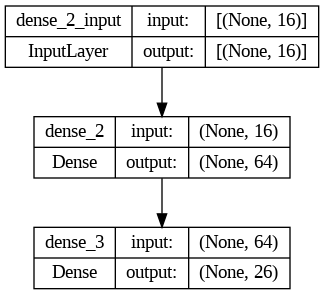

<Figure size 1000x1000 with 0 Axes>

In [51]:
plt.figure(figsize=(10,10))
plot_model(model,show_shapes=True)

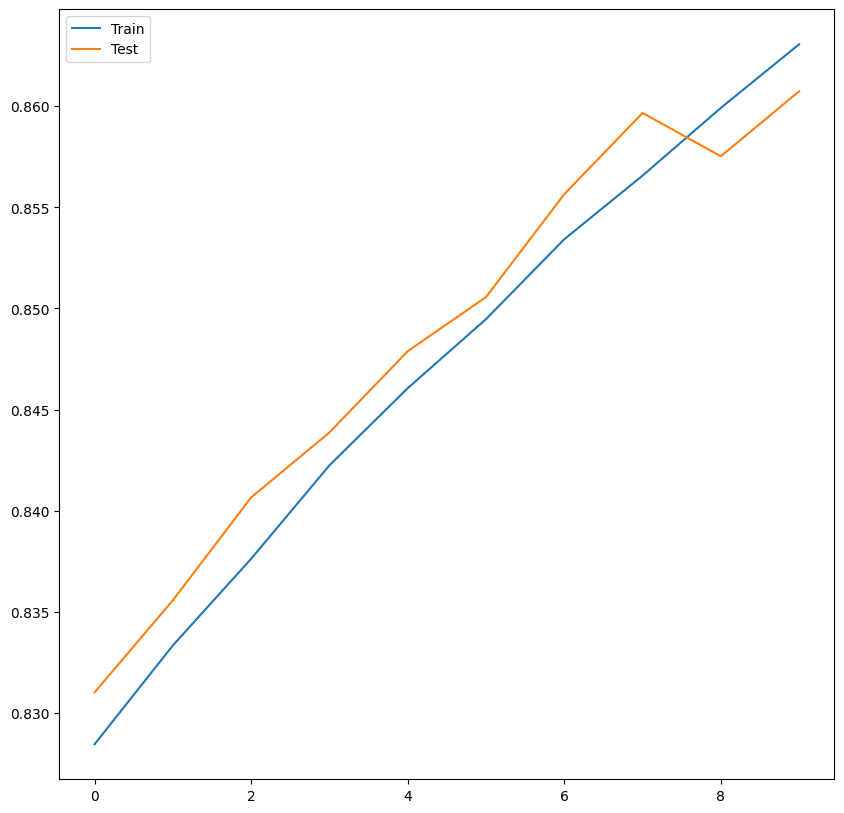

In [53]:
plt.figure(figsize=(10,10))
plt.plot(range(10),history.history['accuracy'],label=('Train'))
plt.plot(range(10),history.history['val_accuracy'],label=('Test'))
plt.legend(loc='best')

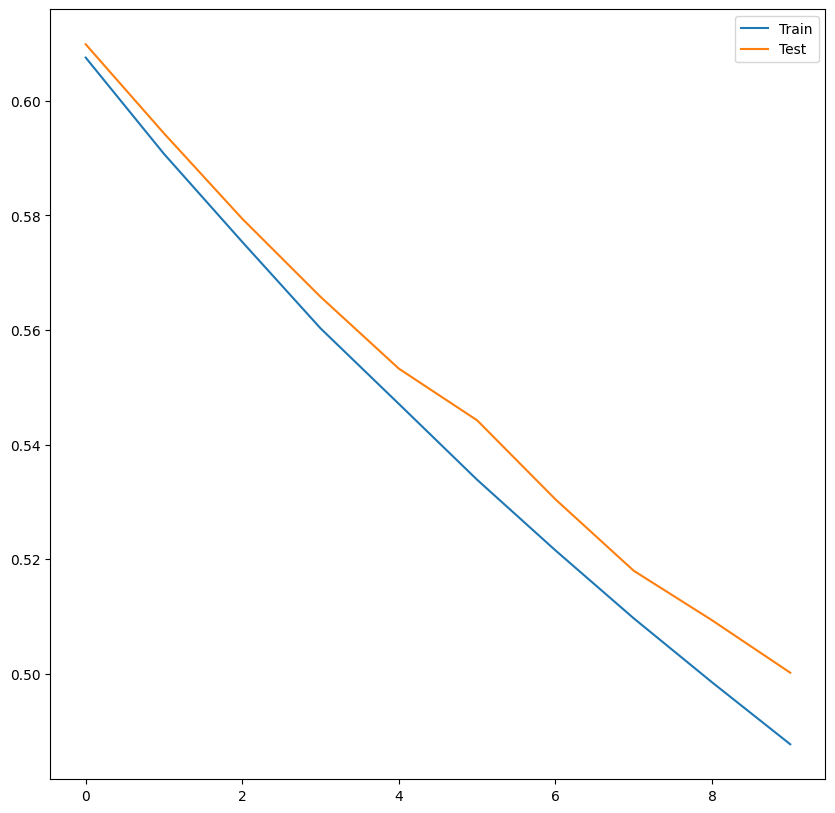

In [54]:
plt.figure(figsize=(10,10))
plt.plot(range(10),history.history['loss'], label=('Train'))
plt.plot(range(10),history.history['val_loss'],label=('Test'))
plt.legend()